# Anatomy of a cranked wing

— Agostino De Marco, <font color='darkblue'><i>University of Naples Federico II, Dept. Industrial Engineering</i></font>

We will use the Python language to work out our examples, so we set up some Python tools first.

In [188]:
# Set up the notebook and import required Python packages
%run ./src/cranked_wing/init.py
%matplotlib inline

Wing data.

In [189]:
c_r = 5.5; c_k = 2.4; c_t = 1.0; 
b_k = 14.0; b = 28
Lambda_le_1 = 24*math.pi/180; Lambda_le_2 = 24*math.pi/180

In [190]:
Latex(
    r'\begin{array}{rl}'
    +  r'\text{root chord,}\, c_{\mathrm{r}}: & ' + r'{0}'.format(c_r) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{kink chord,}\, c_{\mathrm{k}}: & ' + r'{0}'.format(c_k) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{tip chord,}\, c_{\mathrm{t}}: & ' + r'{0}'.format(c_t) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{semispan, inner panel}\, \frac{1}{2}b_{\mathrm{k}}: & ' + r'{0}'.format(b_k/2) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{semispan,}\, \frac{1}{2}b: & ' + r'{0}'.format(b/2) + r'\,\text{m}'
    +  r'\\'
    +  r'\text{leading edge sweep, inner panel,}\, \Lambda_{\mathrm{le},1}: &' 
    +    r'{0}'.format(Lambda_le_1*180/math.pi) + r'\,\text{deg}'
    +  r'\\'
    +  r'\text{leading edge sweep, outer panel,}\, \Lambda_{\mathrm{le},2}: &' 
    +    r'{0}'.format(Lambda_le_2*180/math.pi) + r'\,\text{deg}'
    +r'\end{array}'
)

<IPython.core.display.Latex object>

Wing platform.

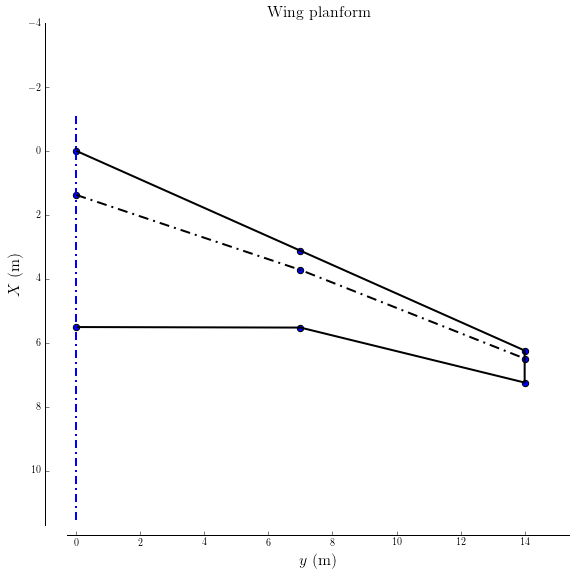

In [191]:
plot_planform(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)

### The law of the chords, $c(y)$

The function $c(y)$ is the piecewise linear law that gives the chord at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
c(y) = 
\begin{cases}
A_{c,1} y + B_{c,1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{c,2} \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{c,2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{c} = 
\begin{cases}
A_{c,1} = \dfrac{2}{b_{\mathrm{k}}} \left( c_{\mathrm{k}} - c_{\mathrm{r}} \right)  
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{c,2} = \dfrac{2}{b - b_{\mathrm{k}}} \left( c_{\mathrm{t}} - c_{\mathrm{k}} \right)  
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{c} = 
\begin{cases}
B_{c,1} = c_{\mathrm{r}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{c,2} = c_{\mathrm{k}}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

The following code defines function $c(y)$ calculating the above two coefficients:

In [192]:
# c(y)
def f_chord(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    if y >= 0 and y <= b_k/2:
        A_ = 2*(c_k - c_r)/b_k; B_ = c_r;
        return A_*y + B_
    elif y > b_k/2 and y <= b/2:
        A_ = (c_t - c_k)/(b/2 - b_k/2); B_ = c_k;
        return A_*(y - b_k/2) + B_
    
def f_chord_1(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    A_ = 2*(c_k - c_r)/b_k; B_ = c_r;
    return A_*y + B_

def f_chord_2(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    A_ = (c_t - c_k)/(b/2 - b_k/2); B_ = c_k;
    return A_*(y - b_k/2) + B_

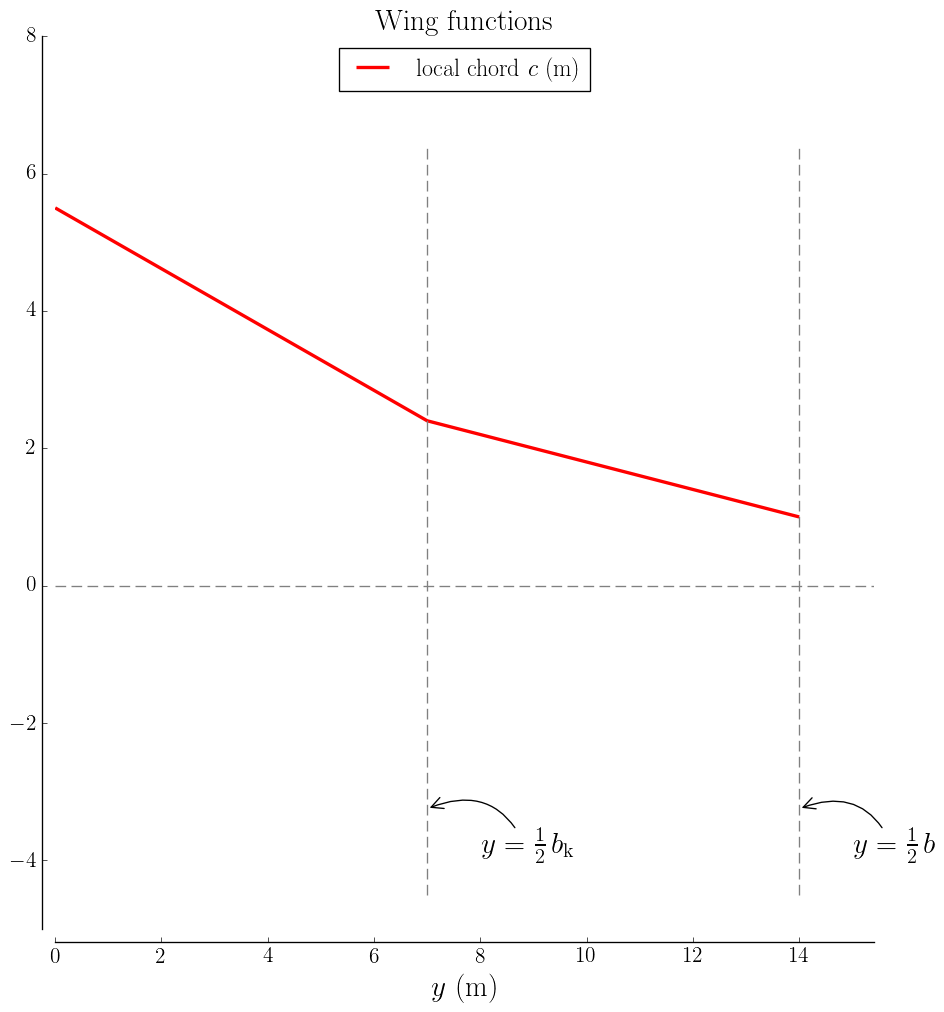

In [193]:
%run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2, 
                    f_chord = f_chord)

### The law of the leading edge positions, $X_{\mathrm{le}}(y)$

The function $X_{\mathrm{le}}(y)$ is the piecewise law that gives the local leading edge longitudinal coordinate at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
X_{\mathrm{le}}(y) = 
\begin{cases}
A_{X_{\mathrm{le}},1} \, y + B_{X_{\mathrm{le}},1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{X_{\mathrm{le}},2} \, \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{X_{\mathrm{le}},2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{X_{\mathrm{le}}} = 
\begin{cases}
A_{X_{\mathrm{le}},1} = \tan \Lambda_{\mathrm{le},1}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{X_{\mathrm{le}},2} = \tan \Lambda_{\mathrm{le},2}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{X_{\mathrm{le}}} = 
\begin{cases}
B_{X_{\mathrm{le}},1} = 0 \, \mathrm{m}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{X_{\mathrm{le}},2} = \frac{1}{2} b_{\mathrm{k}} \, \tan \Lambda_{\mathrm{le},1}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

In [194]:
# X_le(y)
def f_Xle(y, b_k, b, Lambda_le_1, Lambda_le_2):
    if y >= 0 and y <= b_k/2:
        A_ = math.tan(Lambda_le_1);
        return A_*y
    elif y > b_k/2 and y <= b/2:
        A_ = math.tan(Lambda_le_2);
        return (b_k/2)*math.tan(Lambda_le_1) + A_*(y - b_k/2)
    
def f_Xle_1(y, b_k, b, Lambda_le_1, Lambda_le_2):
    A_ = math.tan(Lambda_le_1);
    return A_*y
    
def f_Xle_2(y, b_k, b, Lambda_le_1, Lambda_le_2):
    A_ = math.tan(Lambda_le_2);
    return (b_k/2)*math.tan(Lambda_le_1) + A_*(y - b_k/2)

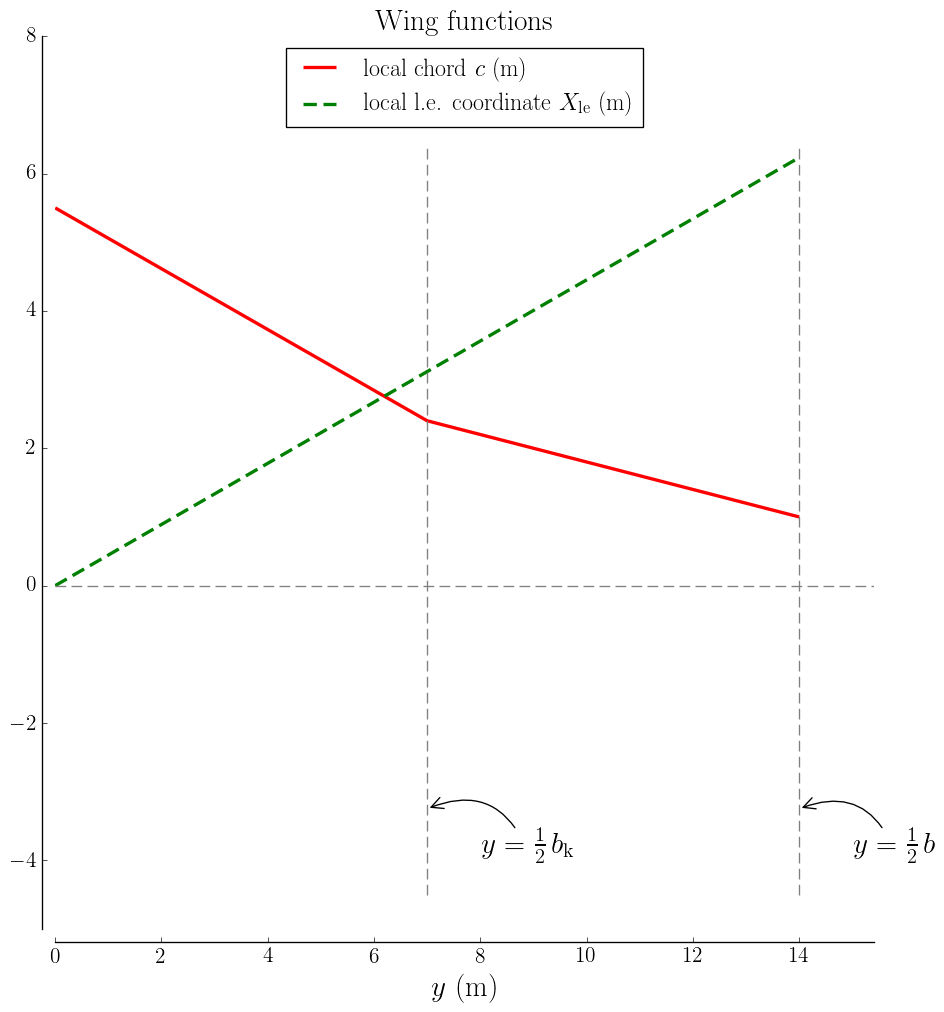

In [195]:
%run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2, 
                    f_chord = f_chord,
                    f_Xle = f_Xle)

### Calculate $S$, $\bar{c}$, $X_{\mathrm{le},\bar{c}}$, and $Y_{\bar{c}}$

The reference surface:

\begin{equation}
S = 2 \int_{0}^{b/2} c(y) \, \mathrm{d}y
\end{equation}

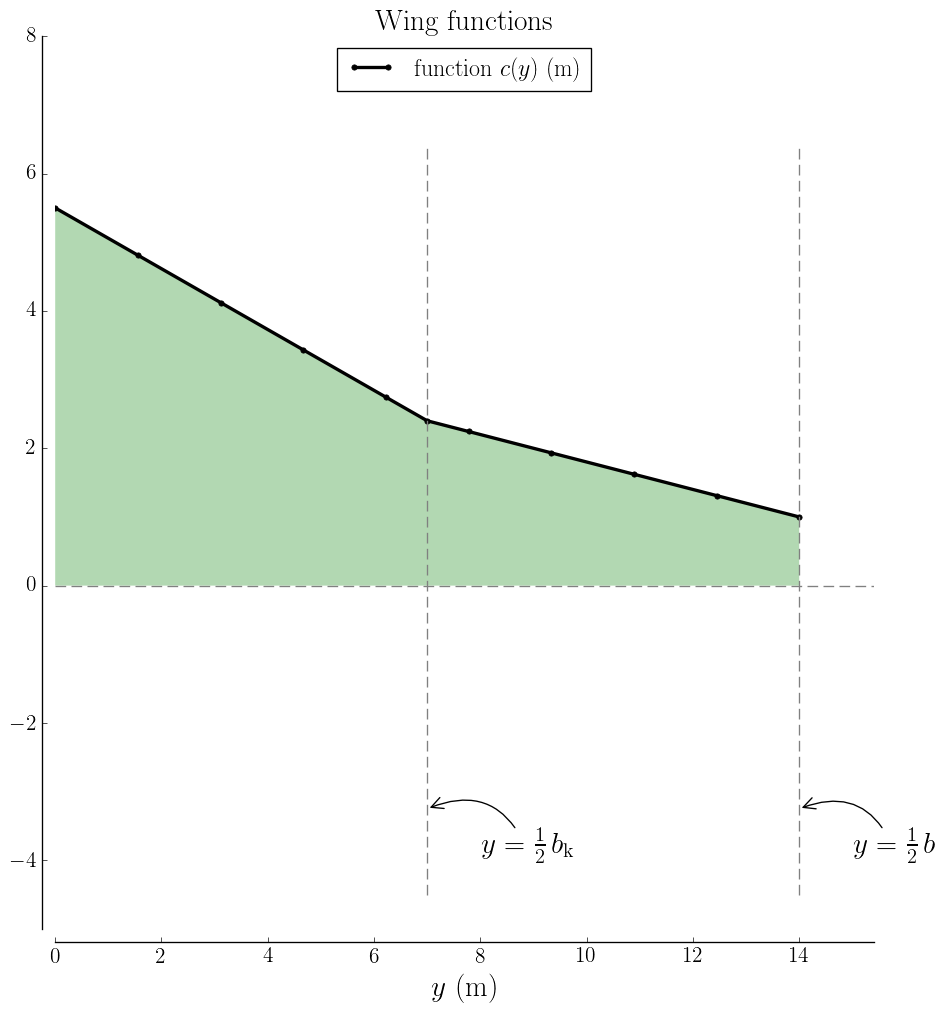

In [196]:
%run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2,
                    n_points = 10,
                    f_S_integral = f_chord)

The planform area is calculated by quadrature of the function $c(y)$. In Python this is done via the package SciPy.

In [197]:
%run ./src/cranked_wing/init.py
# Definite integral via scipy
S_ref_ = scipy.integrate.quad(
    f_chord, 0, b/2, args=(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2))
# print(S_ref_)
S_ref = 2*S_ref_[0]
print('S = {0} m^2'.format(S_ref))

S = 79.10000000000001 m^2


The mean aerodynamic chord:

\begin{equation}
\bar{c} = \frac{2}{S} \int_{0}^{b/2} c^2(y) \, \mathrm{d}y
\end{equation}

In [198]:
# c^2(y)
def f_chord_squared(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    return f_chord(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)**2

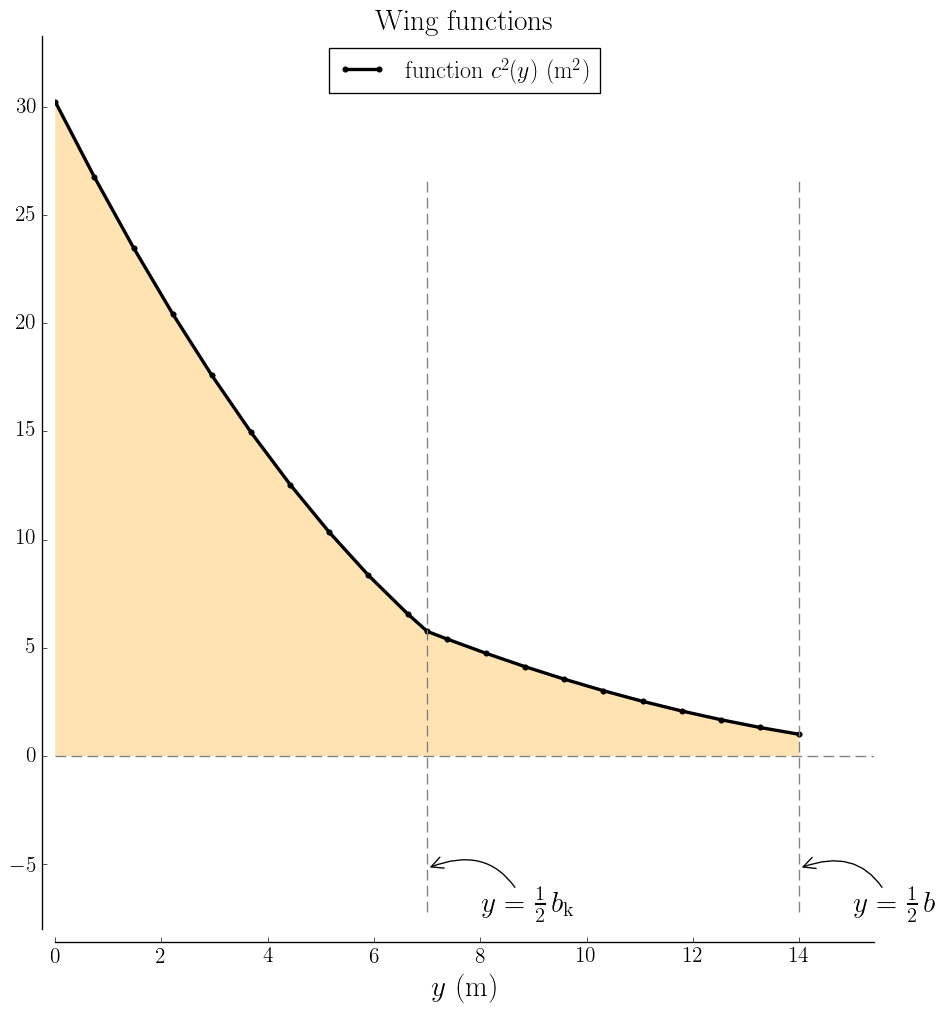

In [199]:
%run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2,
                    n_points = 20, 
                    ymax = 1.1*c_r**2, ymin = -8,
                    f_mac_integral = f_chord_squared)

The mean aerodynamic chord is calculated by quadrature of the function $c^2(y)$.

In [200]:
%run ./src/cranked_wing/init.py
# Definite integral via scipy
c_mac_ = scipy.integrate.quad(
    f_chord_squared, 0, b/2, args=(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2))
print(c_mac_)
c_mac = (2/S_ref)*c_mac_[0]
print('mac = {0} m'.format(c_mac))

(136.19666666666666, 1.5120867521053088e-12)
mac = 3.4436578171091443 m


The mean aerodynamic chord leading edge:

\begin{equation}
X_{\mathrm{le},\bar{c}} = \frac{2}{S} \int_{0}^{b/2} X_{\mathrm{le}}(y) \, c(y) \, \mathrm{d}y
\end{equation}

In [201]:
# X_le(y) * c(y)
def f_Xle_c(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    return f_Xle(y, b_k, b, Lambda_le_1, Lambda_le_2)*f_chord(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)

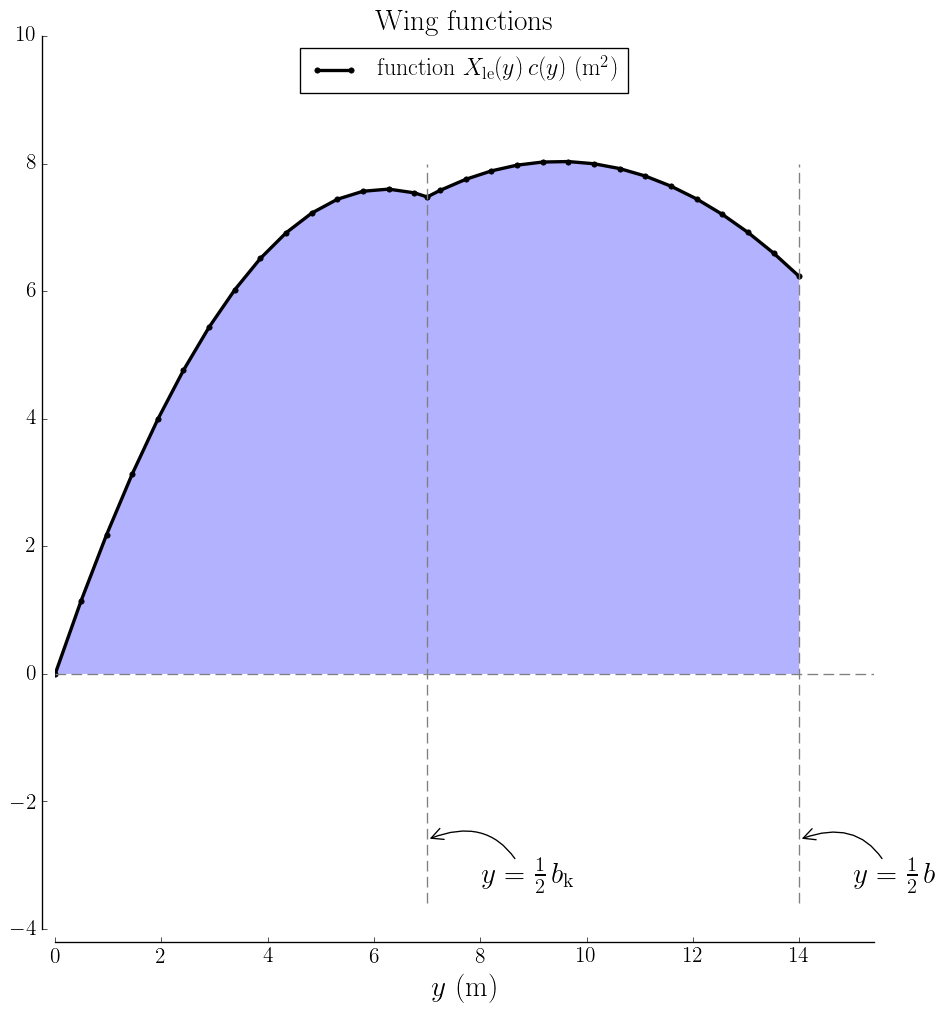

In [202]:
%run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2,
                    n_points = 30, 
                    ymax = 10, ymin = -4,
                    f_Xle_mac_integral = f_Xle_c)

The coordinate $X_{\mathrm{le},\bar{c}}$ of the function $X_{\mathrm{le}}(y)\,c(y)$.

In [203]:
%run ./src/cranked_wing/init.py
# Definite integral via scipy
X_le_mac_ = scipy.integrate.quad(
    f_Xle_c, 0, b/2, args=(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2))
print(X_le_mac_)
X_le_mac = (2/S_ref)*X_le_mac_[0]
print('X_le_mac = {0} m'.format(X_le_mac))

(90.53725315749082, 1.0051654304176296e-12)
X_le_mac = 2.2891846563208804 m


The mean aerodynamic chord spanwise location:

\begin{equation}
Y_{\bar{c}} = \frac{2}{S} \int_{0}^{b/2} y \, c(y) \, \mathrm{d}y
\end{equation}

In [204]:
# y * c(y)
def f_y_c(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2):
    return y*f_chord(y, c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2)

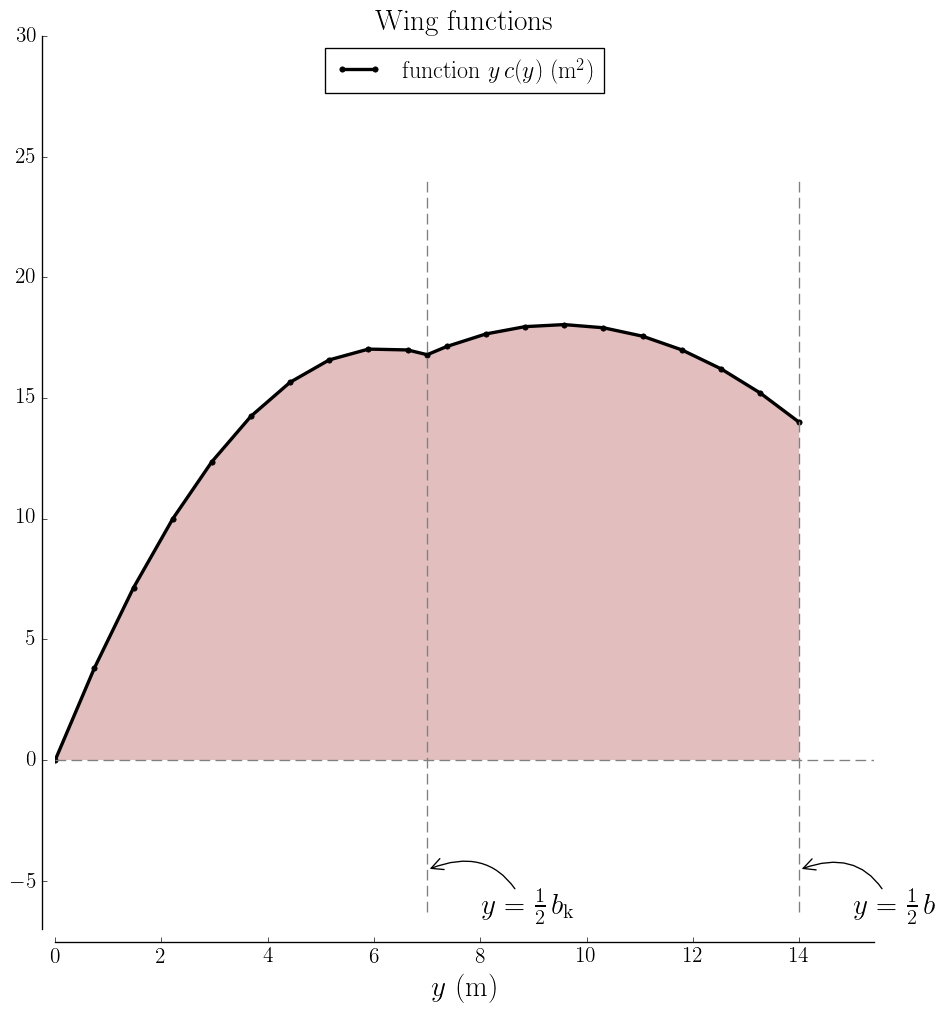

In [205]:
%run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2,
                    n_points = 20, 
                    ymax = 30, ymin = -7,
                    f_Y_mac_integral = f_y_c)

In [206]:
%run ./src/cranked_wing/init.py
# Definite integral via scipy
Y_mac_ = scipy.integrate.quad(
    f_y_c, 0, b/2, args=(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2))
print(Y_mac_)
Y_mac = (2/S_ref)*Y_mac_[0]
print('Y_mac = {0} m'.format(Y_mac))

(203.34999999999997, 2.2576385205752554e-12)
Y_mac = 5.141592920353981 m


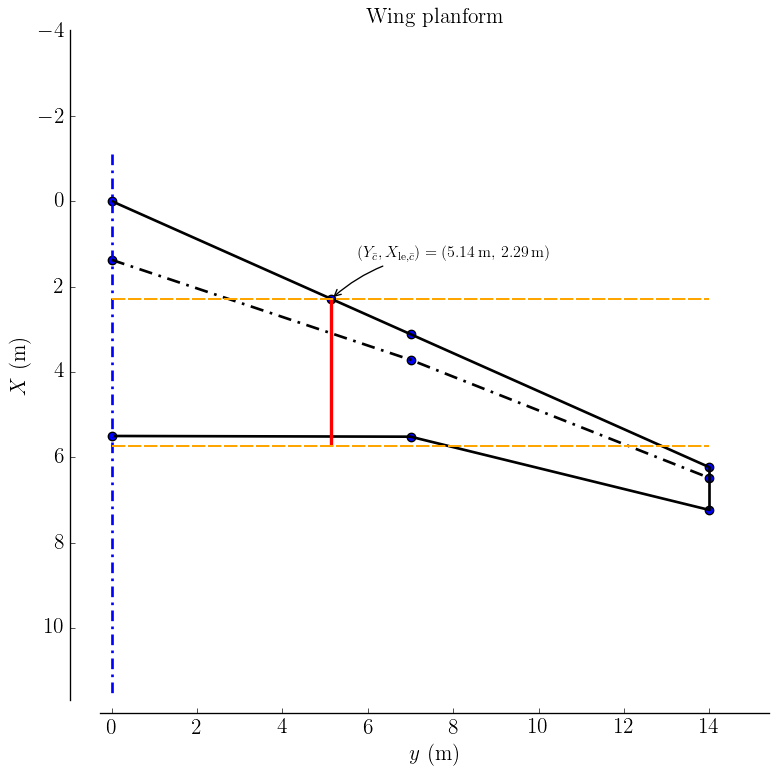

In [207]:
# %run ./src/aerodynamic_center_wing/init.py
plot_planform(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, 
              mac=c_mac, X_le_mac=X_le_mac, Y_mac=Y_mac)

## TODO: fix the part below

In [208]:
%run ./src/cranked_wing/init.py
# Definite integral via scipy
S_ref_ = scipy.integrate.quad(
    f_chord, 0, b/2, args=(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2))
print(S_ref_)
S_ref = 2*S_ref_[0]
print('S = {0} m^2'.format(S_ref))

(39.550000000000004, 4.390932062392494e-13)
S = 79.10000000000001 m^2


In [209]:
print('\nIndefinite integral of c(y): \n' + str(c_law_integral_indefinite.args[1][0]))
#c_law_integral_indefinite.args[1][0] = c_law_integral_indefinite.args[1][0] + b_k/2


Indefinite integral of c(y): 
9.01272726239408*y


In [210]:
print('\nIndefinite integral of c(y): \n' + str(c_law_integral_indefinite))

Latex(
    r'\begin{equation}'
    r'\int c(y) \, \mathrm{d}y ='
    + latex(c_law_integral_indefinite)
    +r'\end{equation}'
)


Indefinite integral of c(y): 
Piecewise((1.85*y, And(y <= 7.0, y >= 0)), (9.01272726239408*y, And(y <= 14.0, y > 7.0)))


<IPython.core.display.Latex object>

In [211]:
S_1 = 2*(c_law_integral_indefinite.subs(y,b_k/2) - c_law_integral_indefinite.subs(y,0))
print('S_1 = {0} m^2'.format(S_1))
S_2 = 2*(c_law_integral_indefinite.subs(y,b/2) - c_law_integral_indefinite.subs(y,b_k/2))
print('S_2 = {0} m^2'.format(S_2))
S_ref = 2*(c_law_integral_indefinite.subs(y,b/2) - c_law_integral_indefinite.subs(y,0))
print('S = {0} m^2'.format(S_ref))

print('====================================')
print( (c_r + c_k)*b_k/2 )
print( (c_k + c_t)*(b/2 - b_k/2) )

S_ref = (c_r + c_k)*b_k/2 + (c_k + c_t)*(b/2 - b_k/2)
print('S = {0} m^2'.format(S_ref))


S_1 = 25.9000000000000 m^2
S_2 = 226.456363347034 m^2
S = 252.356363347034 m^2
55.300000000000004
23.8
S = 79.10000000000001 m^2


In [212]:
print('\nIndefinite integral of c^2(y): ' + str(c_mac_law_integral_indefinite))

Latex(
    r'\begin{equation}'
    r'\int c^2(y) \, \mathrm{d}y ='
    + latex(c_mac_law_integral_indefinite)
    +r'\end{equation}'
)


Indefinite integral of c^2(y): Piecewise((3.4225*y, And(y <= 7.0, y >= 0)), (81.2292527063014*y, And(y <= 14.0, y > 7.0)))


<IPython.core.display.Latex object>

In [213]:
c_mac = (2/S_ref)*(c_mac_law_integral_indefinite.subs(y,b/2) - c_mac_law_integral_indefinite.subs(y,0))
print('mac = {0} m'.format(c_mac))


mac = 28.7537177721421 m


In [214]:
print('\nIndefinite integral of X_le(y)*c(y): ' + str(X_le_mac_law_integral_indefinite))

Latex(
    r'\begin{equation}'
    r'\int X_{\mathrm{le}}(y) \, c(y) \, \mathrm{d}y ='
    + latex(X_le_mac_law_integral_indefinite)
    +r'\end{equation}'
)


Indefinite integral of X_le(y)*c(y): Piecewise((0.411836533910396*y**2, And(y <= 7.0, y >= 0)), (2.00636235504006*y**2, And(y <= 14.0, y > 7.0)))


<IPython.core.display.Latex object>

In [215]:
X_le_mac = (2/S_ref)*(X_le_mac_law_integral_indefinite.subs(y,b/2) - X_le_mac_law_integral_indefinite.subs(y,0))
print('X_le_mac = {0} m'.format(X_le_mac))


X_le_mac = 9.94303467984453 m


In [216]:
print('\nIndefinite integral of y*c(y): ' + str(Y_mac_law_integral_indefinite))

Latex(latex(Y_mac_law_integral_indefinite))
Latex(
    r'\begin{equation}'
    r'\int y \, c(y) \, \mathrm{d}y ='
    + latex(Y_mac_law_integral_indefinite)
    +r'\end{equation}'
)


Indefinite integral of y*c(y): Piecewise((0.925*y**2, And(y <= 7.0, y >= 0)), (4.50636363119704*y**2, And(y <= 14.0, y > 7.0)))


<IPython.core.display.Latex object>

In [217]:
Y_mac = (2/S_ref)*(Y_mac_law_integral_indefinite.subs(y,b/2) - Y_mac_law_integral_indefinite.subs(y,0))
print('Y_mac = {0} m'.format(Y_mac))


Y_mac = 22.3324215351358 m


### The laws of geometric twist $\epsilon_{\mathrm{g}}(y)$ and of profile zero-lift angle of attack $\alpha_{0\ell}(y)$

The function $\epsilon_{\mathrm{g}}(y)$ is the piecewise law that gives the geometric twist of the wing sectiont at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
\epsilon_{\mathrm{g}}(y) = 
\begin{cases}
A_{\epsilon,1} \, y + B_{\epsilon,1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\epsilon,2} \, \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{\epsilon,2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{\epsilon} = 
\begin{cases}
A_{\epsilon,1} = \dfrac{2}{b_{\mathrm{k}}}\, \epsilon_{\mathrm{g,k}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\epsilon,2} = \dfrac{2}{b - b_{\mathrm{k}}}\, \big( \epsilon_{\mathrm{g,t}} - \epsilon_{\mathrm{g,k}} \big)
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{\epsilon} = 
\begin{cases}
B_{\epsilon,1} = 0 \, \mathrm{rad}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{\epsilon,2} = \epsilon_{\mathrm{g,k}}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

Let us assign the geometric twist at kink and tip sections:

In [218]:
eps_k = 0*math.pi/180
eps_t = -2.0*math.pi/180

The following code defines function $\epsilon_{\mathrm{g}}(y)$ calculating the above two coefficients:

In [219]:
# eps_g(y)
def f_twist(eps_k, eps_t, b_k, b, y):
    if y >= 0 and y <= b_k/2:
        A_ = 2*eps_k/b_k; B_ = 0;
        return A_*y + B_
    elif y > b_k/2 and y <= b/2:
        A_ = (eps_t - eps_k)/(b/2 - b_k/2); B_ = eps_k;
        return A_*(y - b_k/2) + B_
    
def f_twist_1(eps_k, eps_t, b_k, b, y):
    A_ = 2*eps_k/b_k; B_ = 0;
    return A_*y + B_

def f_twist_2(eps_k, eps_t, b_k, b, y):
    A_ = (eps_t - eps_k)/(b/2 - b_k/2); B_ = eps_k;
    return A_*(y - b_k/2) + B_

The function $\alpha_{0\ell}(y)$ is the piecewise law that gives the zero-lift angle of attack of the wing sectiont at the generic spanwise station $y\in \big[0,\frac{1}{2}b\big]$. This has the form

\begin{equation}
\alpha_{0\ell}(y) = 
\begin{cases}
A_{\alpha,1} \, y + B_{\alpha,1}  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\alpha,2} \, \big( y - \frac{1}{2}b_{\mathrm{k}} \big) + B_{\alpha,2} & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

with 

\begin{equation}
A_{\alpha} = 
\begin{cases}
A_{\alpha,1} = \dfrac{2}{b_{\mathrm{k}}}\, \alpha_{0\ell,\mathrm{k}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
A_{\alpha,2} = \dfrac{2}{b - b_{\mathrm{k}}}\, \big( \alpha_{0\ell,\mathrm{t}} - \alpha_{0\ell,\mathrm{k}} \big)
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

and

\begin{equation}
B_{\alpha} = 
\begin{cases}
B_{\alpha,1} = \alpha_{0\ell,\mathrm{r}}
  & \text{if $\;0\le y \le \frac{1}{2}b_{\mathrm{k}}$} \\[0.5em]
B_{\alpha,2} = \alpha_{0\ell,\mathrm{k}}
  & \text{if $\;\frac{1}{2}b_{\mathrm{k}} < y \le \frac{1}{2}b$}
\end{cases}
\end{equation}

Let us assign the profile zero-lift alpha at root, kink and tip sections:

In [220]:
# alpha0l(y)
def f_alpha0l(alpha0l_r, alpha0l_k, alpha0l_t, b_k, b, y):
    if y >= 0 and y <= b_k/2:
        A_ = 2*(alpha0l_k - alpha0l_r)/b_k; B_ = alpha0l_r;
        return A_*y + B_
    elif y > b_k/2 and y <= b/2:
        A_ = (alpha0l_t - alpha0l_k)/(b/2 - b_k/2); B_ = alpha0l_k;
        return A_*(y - b_k/2) + B_
    
def f_alpha0l_1(alpha0l_r, alpha0l_k, alpha0l_t, b_k, b, y):
    A_ = 2*(alpha0l_k - alpha0l_r)/b_k; B_ = alpha0l_r;
    return A_*y + B_

def f_alpha0l_2(alpha0l_r, alpha0l_k, alpha0l_t, b_k, b, y):
    A_ = (alpha0l_t - alpha0l_k)/(b/2 - b_k/2); B_ = alpha0l_k;
    return A_*(y - b_k/2) + B_

## Wing functions

In [221]:
alpha0l_r = -3.0*math.pi/180
alpha0l_k = -3.0*math.pi/180
alpha0l_t = -2.0*math.pi/180

The following code defines function $\epsilon_{\mathrm{g}}(y)$ calculating the above two coefficients:

In [222]:
# alpha0l(y)
def f_alpha0l(alpha0l_r, alpha0l_k, alpha0l_t, b_k, b, y):
    if y >= 0 and y <= b_k/2:
        A_ = 2*(alpha0l_k - alpha0l_r)/b_k; B_ = alpha0l_r;
        return A_*y + B_
    elif y > b_k/2 and y <= b/2:
        A_ = (alpha0l_t - alpha0l_k)/(b/2 - b_k/2); B_ = alpha0l_k;
        return A_*(y - b_k/2) + B_
    
def f_alpha0l_1(alpha0l_r, alpha0l_k, alpha0l_t, b_k, b, y):
    A_ = 2*(alpha0l_k - alpha0l_r)/b_k; B_ = alpha0l_r;
    return A_*y + B_

def f_alpha0l_2(alpha0l_r, alpha0l_k, alpha0l_t, b_k, b, y):
    A_ = (alpha0l_t - alpha0l_k)/(b/2 - b_k/2); B_ = alpha0l_k;
    return A_*(y - b_k/2) + B_

## Wing functions

TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'

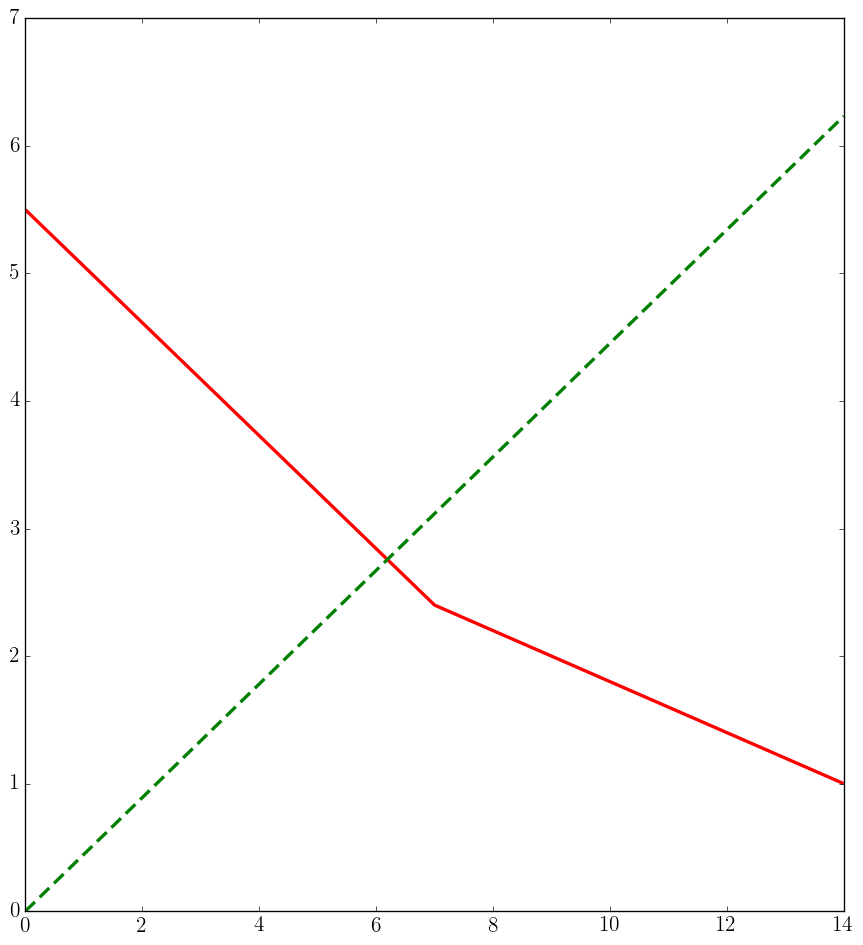

In [223]:
%run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2, 
                    f_chord = f_chord, 
                    f_Xle = f_Xle, 
                    f_twist = f_twist, 
                    f_alpha0l = f_alpha0l,
                    f_S_integral_indefinite = c_law_integral_indefinite)

## The wing zero-lift angle of attack $\alpha_{0L,\mathrm{W}}$

The zero-lift angle of attack is given by the following formula:

\begin{equation}
\alpha_{0L,\mathrm{W}} 
  = \frac{2}{S} \int_0^{b/2} 
    \big[\alpha_{0\ell}(y) - \epsilon_{\mathrm{g}}(y)\big]
    c(y) \, \mathrm{d}y
\end{equation}

where the functions $c(y)$, $\alpha_{0\ell}(y)$, and $\epsilon_{\mathrm{g}}(y)$ are the piecewise linear functions defined above.

Let us resolve the above integral with the aid of Python and the package SymPy.

In [ ]:
# %run ./src/aerodynamic_center_wing/init.py
# symbolic variable
y = Symbol('y')

# indefinite integrals

alpha0L_law_integral_indefinite = integrate( 
    Piecewise( 
        (
            (f_alpha0l_1(alpha0l_r, alpha0l_k, alpha0l_t, b_k, b, y)
                -f_twist_1(eps_k, eps_t, b_k, b, y))
                *f_chords_1(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, y), 
            And(y >= 0, y <= b_k/2)
        ), 
        (
            (f_alpha0l_2(alpha0l_r, alpha0l_k, alpha0l_t, b_k, b, y)
                -f_twist_2(eps_k, eps_t, b_k, b, y))
                *f_chords_2(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, y), 
            And(y > b_k/2, y <= b/2)
        )
    ),
    y)


In [ ]:
print('\nIndefinite integral of [(]alpha_0l(y) - eps_g(y)]*c(y): ' + str(alpha0L_law_integral_indefinite))

Latex(
    r'\begin{equation}'
    r'\int \big[\alpha_{0\ell}(y) - \epsilon_{\mathrm{g}}(y)\big] c(y) \, \mathrm{d}y ='
    + latex(alpha0L_law_integral_indefinite)
    +r'\end{equation}'
)

In [ ]:
%run ./src/cranked_wing/init.py
plot_wing_functions(c_r, c_k, c_t, 
                    eps_k, eps_t, alpha0l_r, alpha0l_k, alpha0l_t,
                    b_k, b, Lambda_le_1, Lambda_le_2, 
                    f_chords, f_Xle, f_twist, f_alpha0l,
                    f_alpha0L_integral_indefinite = alpha0L_law_integral_indefinite)

The definite integral is:

In [ ]:
# definite integral
alpha0L = (2/S_ref)*(alpha0L_law_integral_indefinite.subs(y,b/2) - alpha0L_law_integral_indefinite.subs(y,0))

print(alpha0L_law_integral_indefinite)
print(alpha0L_law_integral_indefinite.subs(y,b/2))
print(S_ref)
print(alpha0L_law_integral_indefinite.subs(y,b/2)/S_ref)

print('alpha_0L = {0} rad'.format(alpha0L))
print('alpha_0L = {0} deg'.format(alpha0L*180/math.pi))

## TODO: check the above result

In [ ]:
%run ./src/cranked_wing/init.py
plot_planform(c_r, c_k, c_t, b_k, b, Lambda_le_1, Lambda_le_2, mac=c_mac, X_le_mac=X_le_mac, Y_mac=Y_mac) # , X_ac=X_ac